In [5]:
import rasterio as rs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fl = './data/withdr1k.tiff'

In [3]:
with rs.open(fl) as ds:
    dat = ds.read(1)
    noData = ds.nodata

In [6]:
dat4 = np.zeros_like(dat,dtype=np.uint8)
dat4[:] = 1
dat[dat==noData] = 0
dat[dat<0] = 0
dat4[dat != 0] = 0

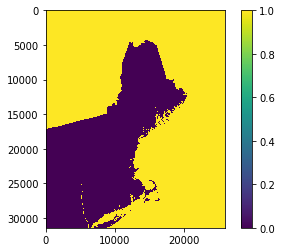

In [7]:
plt.imshow(dat4)
plt.colorbar()

In [8]:
dat4.dtype

dtype('uint8')

In [9]:
with rs.open(fl) as ds:
    profile = ds.profile

In [18]:
noDataOut = -9999

In [19]:
profile

{'driver': 'GTiff', 'dtype': dtype('uint8'), 'nodata': 255, 'width': 25845, 'height': 31405, 'count': 1, 'crs': CRS({'proj': 'aea', 'lat_1': 29.5, 'lat_2': 45.5, 'lat_0': 0, 'lon_0': 0, 'x_0': 0, 'y_0': 0, 'datum': 'NAD83', 'units': 'm', 'no_defs': True}), 'transform': Affine(30.0, 0.0, 1643924.9999999981,
       0.0, -30.0, 3142574.999999998), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'LZW', 'interleave': 'band', 'profile': 'GeoTIFF', 'sparse_ok': True, 'num_threads': 'ALL_CPUS'}

In [21]:
profile.update({'dtype':dat.dtype,
                    'compress':'LZW',
                    'profile':'GeoTIFF',
                    'tiled':True,
                    'sparse_ok':True,
                    'num_threads':'ALL_CPUS',
                    'nodata':noDataOut})

In [22]:
profile

{'driver': 'GTiff', 'dtype': dtype('float32'), 'nodata': -9999, 'width': 25845, 'height': 31405, 'count': 1, 'crs': CRS({'proj': 'aea', 'lat_1': 29.5, 'lat_2': 45.5, 'lat_0': 0, 'lon_0': 0, 'x_0': 0, 'y_0': 0, 'datum': 'NAD83', 'units': 'm', 'no_defs': True}), 'transform': Affine(30.0, 0.0, 1643924.9999999981,
       0.0, -30.0, 3142574.999999998), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'LZW', 'interleave': 'band', 'profile': 'GeoTIFF', 'sparse_ok': True, 'num_threads': 'ALL_CPUS'}

In [23]:
outFl = './data/withdr1k_fill.tiff'

In [25]:
with rs.open(outFl,'w',**profile) as dst:
    dst.write(dat,1)

In [4]:
dat2 = dat[-5000:,-15000:-10000]

In [5]:
dat2

array([[ 4.040e+00,  4.040e+00,  4.040e+00, ..., -9.999e+03, -9.999e+03,
        -9.999e+03],
       [ 4.040e+00,  4.040e+00,  4.040e+00, ..., -9.999e+03, -9.999e+03,
        -9.999e+03],
       [ 4.040e+00,  4.040e+00,  4.040e+00, ..., -9.999e+03, -9.999e+03,
        -9.999e+03],
       ...,
       [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03, -9.999e+03,
        -9.999e+03],
       [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03, -9.999e+03,
        -9.999e+03],
       [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03, -9.999e+03,
        -9.999e+03]], dtype=float32)

In [7]:
np.nanmin(dat2)

-9999.0

In [6]:
np.nanmax(dat2)

33.77

In [9]:
dat2[dat2 == noData] = 0
dat2[dat2<0] = 0
dat3 = np.zeros_like(dat2,dtype=np.uint8)

In [10]:
dat3[:] = 1

In [11]:
dat3[dat2 != 0] = 0

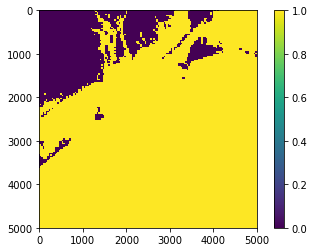

In [12]:
plt.imshow(dat3)
plt.colorbar()

In [8]:
noData

-9999.0

In [9]:
dat[dat==noData] = 

array([[-1.401e-45, -1.401e-45, -1.401e-45, ...,        nan,        nan,
               nan],
       [-1.401e-45, -1.401e-45, -1.401e-45, ...,        nan,        nan,
               nan],
       [-1.401e-45, -1.401e-45, -1.401e-45, ...,        nan,        nan,
               nan],
       ...,
       [ 1.629e+01,  1.629e+01,  1.629e+01, ...,        nan,        nan,
               nan],
       [ 1.629e+01,  1.629e+01,  1.629e+01, ...,        nan,        nan,
               nan],
       [ 1.629e+01,  1.629e+01,  1.629e+01, ...,        nan,        nan,
               nan]], dtype=float32)

MemoryError: 

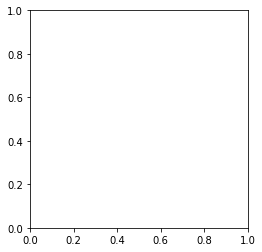

In [10]:
plt.imshow(dat)